In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
import joblib
import pickle

In [3]:
# Load the dataset
data = pd.read_csv('nyc-rolling-sales_new_cleaned_data.csv')

# Display the first few rows of the dataset
data.head()


,N/O,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,SALE YEAR,SALE MONTH,SALE DAY,PROPERTY AGE,PRICE PER SQFT,BUILDING VOLUME,IS RENOVATED,SEASON,TAX CLASS CHANGE,BUILDING SIZE CATEGORY
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,...,2017,7,19,117.0,1028.726708,32200.0,0,Summer,1,Medium
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,...,2016,12,14,116.0,NaN,579390.0,0,Winter,1,Large
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,...,2016,9,12,116.0,NaN,132651.0,0,Fall,1,Medium
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,...,2016,9,23,103.0,579.374742,67940.0,0,Fall,1,Medium
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,...,2016,11,17,116.0,1733.477790,27690.0,0,Fall,1,Small


In [4]:
# Summary statistics for numerical columns
numerical_summary = data.describe().transpose()

numerical_summary

,count,mean,std,min,25%,50%,75%,max
N/O,84548.0,1.034436e+04,7.151779e+03,4.000000,4231.00000,8942.000000,1.598725e+04,2.673900e+04
BOROUGH,84548.0,2.998758e+00,1.289790e+00,1.000000,2.00000,3.000000,4.000000e+00,5.000000e+00
BLOCK,84548.0,4.237219e+03,3.568263e+03,1.000000,1322.75000,3311.000000,6.281000e+03,1.632200e+04
LOT,84548.0,3.762240e+02,6.581368e+02,1.000000,22.00000,50.000000,1.001000e+03,9.106000e+03
ZIP CODE,84548.0,1.073199e+04,1.290879e+03,0.000000,10305.00000,11209.000000,1.135700e+04,1.169400e+04
RESIDENTIAL UNITS,84548.0,2.025264e+00,1.672104e+01,0.000000,0.00000,1.000000,2.000000e+00,1.844000e+03
COMMERCIAL UNITS,84548.0,1.935587e-01,8.713183e+00,0.000000,0.00000,0.000000,0.000000e+00,2.261000e+03
TOTAL UNITS,84548.0,2.249184e+00,1.897258e+01,0.000000,1.00000,1.000000,2.000000e+00,2.261000e+03
LAND SQUARE FEET,47970.0,3.495571e+03,3.253806e+03,2.000000,2000.00000,2500.000000,4.000000e+03,2.500000e+04
GROSS SQUARE FEET,45519.0,3.539465e+03,7.218769e+03,60.000000,1416.50000,2000.000000,2.881000e+03,5.840624e+04


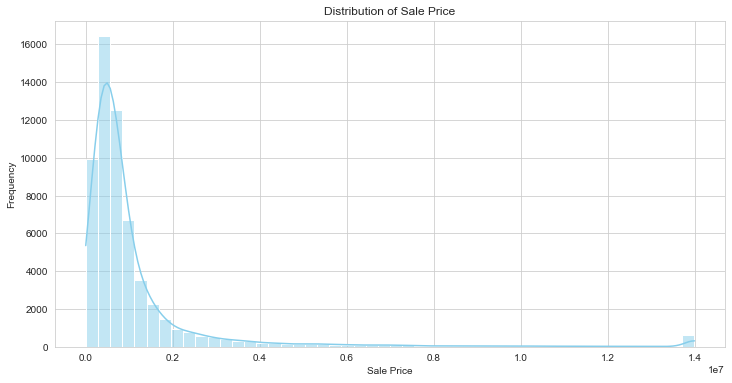

In [4]:
# Setting the style
sns.set_style("whitegrid")

# Plotting the distribution of Sale Price
plt.figure(figsize=(12, 6))
sns.histplot(data['SALE PRICE'].dropna(), bins=50, kde=True, color='skyblue')
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()


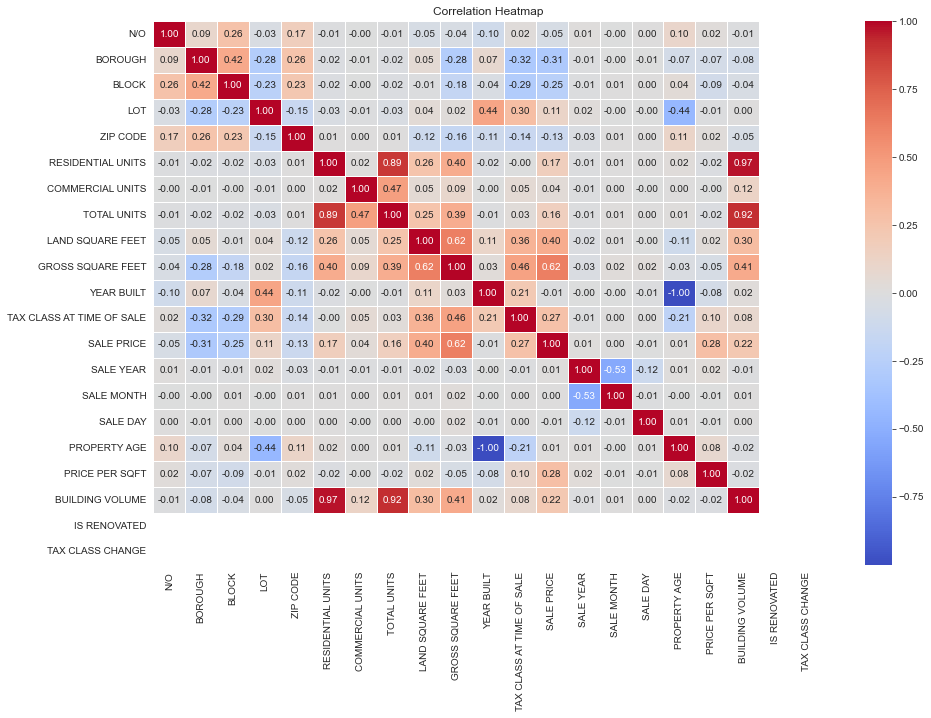

In [5]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plotting the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

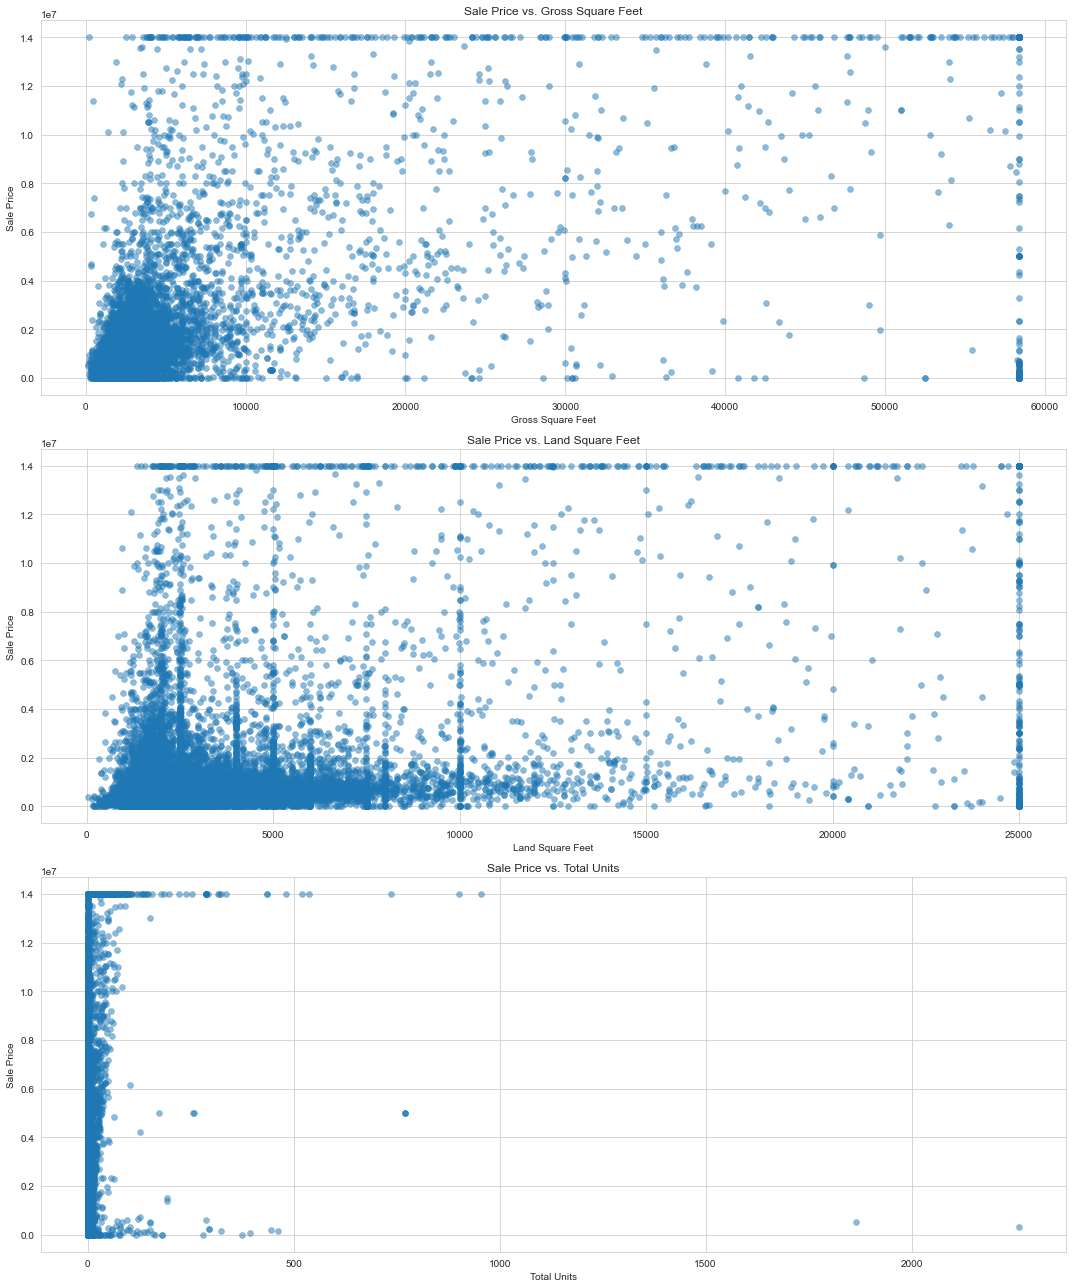

In [6]:
# Setting up the figure and axes
fig, ax = plt.subplots(3, 1, figsize=(15, 18))

# Plotting the relationships
sns.scatterplot(data=data, x='GROSS SQUARE FEET', y='SALE PRICE', ax=ax[0], alpha=0.5, edgecolor=None)
ax[0].set_title('Sale Price vs. Gross Square Feet')
ax[0].set_xlabel('Gross Square Feet')
ax[0].set_ylabel('Sale Price')

sns.scatterplot(data=data, x='LAND SQUARE FEET', y='SALE PRICE', ax=ax[1], alpha=0.5, edgecolor=None)
ax[1].set_title('Sale Price vs. Land Square Feet')
ax[1].set_xlabel('Land Square Feet')
ax[1].set_ylabel('Sale Price')

sns.scatterplot(data=data, x='TOTAL UNITS', y='SALE PRICE', ax=ax[2], alpha=0.5, edgecolor=None)
ax[2].set_title('Sale Price vs. Total Units')
ax[2].set_xlabel('Total Units')
ax[2].set_ylabel('Sale Price')

plt.tight_layout()
plt.show()

In [7]:
# Setting a threshold for correlation
correlation_threshold = 0.2

# Extracting features that have a correlation above the threshold with the target variable
important_features_corr = correlation_matrix['SALE PRICE'][correlation_matrix['SALE PRICE'].abs() > correlation_threshold]
important_features_corr = important_features_corr.drop('SALE PRICE')  # Drop target variable itself

important_features_corr

BOROUGH                     -0.305974
BLOCK                       -0.247207
LAND SQUARE FEET             0.400922
GROSS SQUARE FEET            0.621284
TAX CLASS AT TIME OF SALE    0.268498
PRICE PER SQFT               0.282243
BUILDING VOLUME              0.220856
Name: SALE PRICE, dtype: float64

In [8]:
# Dropping non-numeric columns for this analysis
numeric_data = data.select_dtypes(include=['float64', 'int64']).dropna()

# Splitting data into features and target variable
X = numeric_data.drop('SALE PRICE', axis=1)
y = numeric_data['SALE PRICE']

# Fitting the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Extracting feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

feature_importances


GROSS SQUARE FEET            0.605652
PRICE PER SQFT               0.389206
ZIP CODE                     0.000767
BUILDING VOLUME              0.000728
BLOCK                        0.000615
LAND SQUARE FEET             0.000571
SALE DAY                     0.000352
N/O                          0.000344
LOT                          0.000315
PROPERTY AGE                 0.000260
SALE MONTH                   0.000255
TOTAL UNITS                  0.000223
YEAR BUILT                   0.000198
COMMERCIAL UNITS             0.000160
BOROUGH                      0.000149
RESIDENTIAL UNITS            0.000110
SALE YEAR                    0.000064
TAX CLASS AT TIME OF SALE    0.000032
IS RENOVATED                 0.000000
TAX CLASS CHANGE             0.000000
dtype: float64

In [9]:
# Selecting the most important features based on our analyses
selected_features = ['GROSS SQUARE FEET', 'PRICE PER SQFT', 'LAND SQUARE FEET', 'BOROUGH', 'BLOCK']

# Filtering the dataset to only include rows without missing values in the selected features and target variable
filtered_data = data[selected_features + ['SALE PRICE']].dropna()

# Splitting the data into training and test sets
X = filtered_data[selected_features]
y = filtered_data['SALE PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape

((20530, 5), (8799, 5))

In [10]:
# Re-initializing the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Dictionary to store the results
results = {}

# Training and evaluating each model
for name, model in models.items():
    # Training the model
    model.fit(X_train, y_train)
    
    # Predicting on the test set
    predictions = model.predict(X_test)
    
    # Calculating R^2 and RMSE
    r2 = r2_score(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    
    results[name] = [r2, rmse]

# Converting results to a DataFrame for better visualization
results_df = pd.DataFrame(results, index=["R^2", "RMSE"]).transpose()
results_df


,R^2,RMSE
Linear Regression,0.531653,1.326999e+06
Decision Tree,0.988463,2.082719e+05
Random Forest,0.995615,1.284092e+05
Gradient Boosting,0.988918,2.041272e+05


In [11]:
from joblib import dump
dump(model, 'model_filename1.pkl')

['model_filename1.pkl']